# Titanic dataset

In [1]:
import pandas as pd

titanic_df=pd.read_csv('./titanic.csv')
titanic_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [2]:
titanic_df.shape

(891, 12)

In [3]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


## Data cleaning and feature engineering

In [5]:
titanic_df.drop(['PassengerId','Name','Cabin'],inplace=True,axis=1)

In [6]:
titanic_df[titanic_df['Age'].isnull()].sample(n=10)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
511,0,3,male,NaN,0,0,SOTON/OQ 3101316,8.0500,S
451,0,3,male,NaN,1,0,65303,19.9667,S
306,1,1,female,NaN,0,0,17421,110.8833,C
334,1,1,female,NaN,1,0,PC 17611,133.6500,S
495,0,3,male,NaN,0,0,2627,14.4583,C
351,0,1,male,NaN,0,0,113510,35.0000,S
766,0,1,male,NaN,0,0,112379,39.6000,C
692,1,3,male,NaN,0,0,1601,56.4958,S
768,0,3,male,NaN,1,0,371110,24.1500,Q
602,0,1,male,NaN,0,0,113796,42.4000,S


In [7]:
titanic_df[titanic_df['Embarked'].isnull()]

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
61,1,1,female,38.0,0,0,113572,80.0,NaN
829,1,1,female,62.0,0,0,113572,80.0,NaN


In [8]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0],inplace=True)

/tmp/ipykernel_42169/2903618877.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
/tmp/ipykernel_42169/2903618877.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inp

In [9]:
titanic_df["Sex"] = titanic_df["Sex"].astype(str).map({"male": 1, "female": 0})
titanic_df["Embarked"] = (
    titanic_df["Embarked"].astype(str).map({"C": 1, "Q": 2, "S": 3})
)
titanic_df["Ticket"] = pd.to_numeric(
    titanic_df["Ticket"].astype(str).str.replace(r"\D", "", regex=True),errors='coerce'
).astype('Int64')

In [10]:
titanic_df['Ticket'].fillna(titanic_df['Ticket'].mode()[0],inplace=True)

/tmp/ipykernel_42169/2382739267.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Ticket'].fillna(titanic_df['Ticket'].mode()[0],inplace=True)


In [11]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    Int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int64  
dtypes: Int64(1), float64(2), int64(6)
memory usage: 63.6 KB


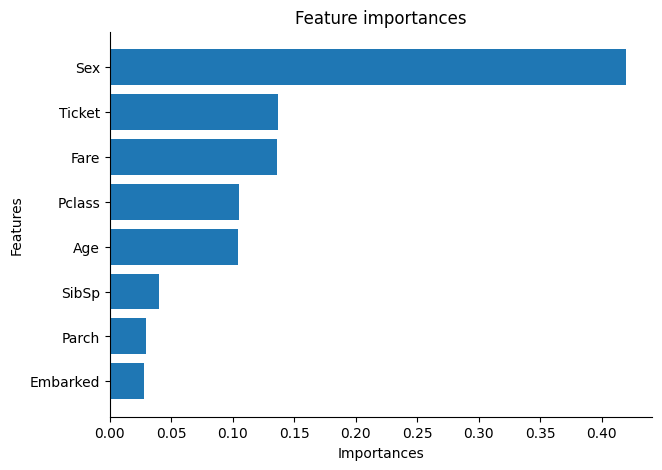

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

X = titanic_df.drop("Survived", axis=1).copy()
y = titanic_df["Survived"].copy()

xTrain, xTest, yTrain, yTest = train_test_split(X, y, random_state=42)

# scaler = StandardScaler()
# xTrainScaled = scaler.fit_transform(xTrain)
# xTestScaled = scaler.transform(xTest)

# rf = RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)
# rf.fit(xTrainScaled, yTrain)

pipe = Pipeline(
    [
        ("Scale", StandardScaler()),
        ("RF", RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42)),
    ]
)

pipe.fit(xTrain,yTrain)


imp = pipe.named_steps['RF'].feature_importances_
indicies = np.argsort(imp)

plt.figure(figsize=(7, 5))
plt.barh(range(len(indicies)), imp[indicies], align="center")
plt.yticks(range(len(indicies)), X.columns[indicies])
plt.title("Feature importances")
plt.ylabel("Features")
plt.xlabel("Importances")
sns.despine()
plt.show()

In [13]:
from sklearn.model_selection import cross_val_score, KFold

kf = KFold(n_splits=5)
cross_val_score(
    RandomForestClassifier(n_estimators=200, max_depth=5, random_state=42),
    xTrain,
    yTrain,
    scoring="accuracy",
    cv=kf,
)

array([0.80597015, 0.86567164, 0.8358209 , 0.79699248, 0.82706767])

## Model training

In [29]:
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import StratifiedKFold

scaler = StandardScaler()
xTrainScaled = scaler.fit_transform(xTrain)
xTestScaled = scaler.transform(xTest)

models = {
    "RF": RandomForestClassifier(),
    "DT": DecisionTreeClassifier(),
    "SVM": SVC(),
    "Logistic": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    # "KMeans": KMeans(),
}

grid_params = {
    "RF": {
        "n_estimators": [50, 100, 200],
        "max_depth": [3, 5, 7],
        "random_state": [42],
    },
    # "DT": {"max_depth": [3, 5], "random_state": [42]},
    "SVM": {"C": [0.1, 0.5, 1.0], "kernel": ["linear", "poly", "rbf"]},
    "Logistic": {"max_iter": [1000, 2000, 3000]},
    "KNN": {"n_neighbors": [3, 5]},
    # "KMeans": {"n_clusters": [3, 5, 7]},
}

grid_res = {}
for model in grid_params.keys():
    grid = GridSearchCV(
        models[model],
        param_grid=grid_params[model],
        scoring="accuracy",
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        error_score="raise",
        n_jobs=-1,
    )
    grid.fit(xTrainScaled, yTrain)
    bestModel = grid.best_estimator_
    yPred = bestModel.predict(xTestScaled)
    acc = accuracy_score(yTest, yPred)
    prec = precision_score(yTest, yPred, zero_division=0)
    rec = recall_score(yTest, yPred, zero_division=0)
    f1 = f1_score(yTest, yPred, zero_division=0)
    grid_res[model] = {
        "Best params": grid.best_params_,
        "Accuracy": acc,
        "Precision": prec,
        "Recall": rec,
        "F1": f1,
    }

pd.DataFrame(grid_res).T

,Best params,Accuracy,Precision,Recall,F1
RF,"{'max_depth': 7, 'n_estimators': 50, 'random_s...",0.816143,0.833333,0.674157,0.745342
SVM,"{'C': 1.0, 'kernel': 'rbf'}",0.820628,0.818182,0.707865,0.759036
Logistic,{'max_iter': 1000},0.807175,0.77381,0.730337,0.751445
KNN,{'n_neighbors': 5},0.793722,0.752941,0.719101,0.735632
